Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = Steven Tey
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

``[1,5,6,2,3,8,9,4,7]``

First, compare the first value to the last value, which is our pivot value. If the first value is larger than the last value, switch the two values. In this case, the first value is smaller than the last value, so we proceed to the next step.

Now, we compare the second value to our pivot value. 5 is smaller than 7, so we move on to the third value and compare that to our pivot value again. 6 is smaller than 7, so we move on. The next two values, 5 and 3, are both smaller than 7, so no swaps happen. Our list is still the same as it is before.

``[1,5,6,2,3,8,9,4,7]``

Now, we compare 8 to our pivot value. Since 8 is bigger than 7, we group that under the elements to the right of the partition. We then move on to 9, which is also bigger than 7, thus we add that to the right group as well. 4, however, is smaller than 7, and therefore we have to swap 8 with 4

``[1,5,6,2,3,4,9,8,7]``

Finally, we swap 9 with 7 to get the final array after the partition process.

``[1,5,6,2,3,4,7,8,9]``

The value of $i$, in this case, is 6, since our pivot value is currently in the position of $i = 6$ in the array.

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [65]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    """
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

In [66]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [67]:
def quick_sort(A,p,r):
    if p < r:
        q = partition(A,p,r)
        quick_sort(A,p,q-1)
        quick_sort(A,q+1,r)
    return A # Important step - the algorithm wouldn't return anything without this command

In [68]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


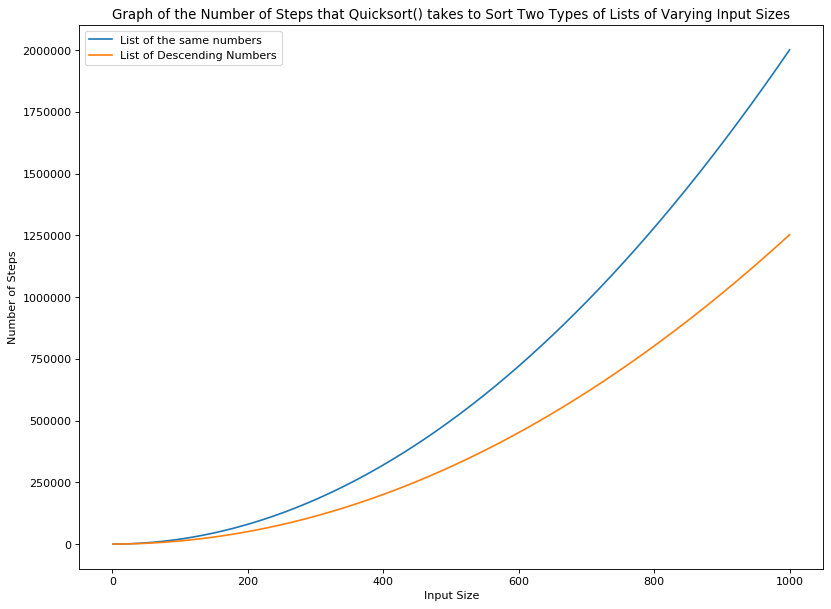

In [100]:
import numpy as np
import matplotlib.pyplot as plt


c = [] # Counter to store the number of steps every time the algorithm runs

def partition(A,p,r):
    x = A[r]
    c.append(1)
    i = p-1
    c.append(1)
    for j in range(p, r):
        c.append(1)
        if A[j] <= x:
            i += 1
            c.append(1)
            A[i], A[j] = A[j], A[i]
            c.append(1) # This exchange counts as two steps
            c.append(1)
    A[i+1], A[r] = A[r], A[i+1]
    c.append(1)
    c.append(1)
    return i+1
    c.append(1)


def quick_sort(A,p,r):
    if p < r:
        q = partition(A,p,r)
        c.append(1)
        quick_sort(A,p,q-1)
        c.append(1)
        quick_sort(A,q+1,r)
        c.append(1)
    return A 
    c.append(1)

same_steps = []
descending_steps = []

for elements in range(1000):
    A_same = np.ones(elements)
    quick_sort(A_same,0,len(A_same)-1)
    same_steps.append(len(c))
    c.clear() # Resetting the counter
    
    A_descending = list(reversed(range(elements)))
    quick_sort(A_descending,0,len(A_descending)-1)
    descending_steps.append(len(c))
    c.clear()
    
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, 1001), same_steps, label = "List of the same numbers")
plt.plot(range(1, 1001), descending_steps, label = "List of Descending Numbers")
plt.xlabel("Input Size")
plt.ylabel("Number of Steps")
plt.legend()
plt.title("Graph of the Number of Steps that Quicksort() takes to Sort Two Types of Lists of Varying Input Sizes")
plt.show()

As we can see from the graph above, as the input size increases, the number of  steps for that the ``quicksort()`` algorithm takes to sort lists of the same numbers increases exponentially but at a might faster rate than the number of steps it takes to sort lists of descending numbers. 